In [69]:
import pandas as pd
import numpy as np

In [70]:
df=pd.read_excel('/content/HousePricePrediction.xlsx')

In [71]:
df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [72]:
df.shape

(2919, 13)

In [73]:
df=df.drop('Id',axis=1)

In [74]:
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [75]:
df[df['BsmtFinSF2']!=0.0].shape

(348, 12)

In [76]:
df.dtypes

MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

In [77]:
df.shape

(2919, 12)

In [78]:
df.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [79]:
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [80]:
df['SalePrice']=df['SalePrice'].fillna(df['SalePrice'].median())

In [81]:
df.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2919.000000
mean,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,171963.667694
std,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,56884.755906
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,163000.000000
50%,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,163000.000000
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [82]:
df.nunique()

MSSubClass        16
MSZoning           5
LotArea         1951
LotConfig          5
BldgType           5
OverallCond        9
YearBuilt        118
YearRemodAdd      61
Exterior1st       15
BsmtFinSF2       272
TotalBsmtSF     1058
SalePrice        663
dtype: int64

In [83]:
df=df.dropna()

In [84]:
df.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000
mean,57.190182,10137.665980,5.566770,1971.391349,1984.314452,49.667353,1052.805012,171982.130450
std,42.538067,7832.598853,1.108977,30.258751,20.864950,169.338330,439.688510,56941.872892
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7476.000000,5.000000,1954.000000,1965.000000,0.000000,793.000000,163000.000000
50%,50.000000,9450.000000,5.000000,1973.000000,1993.000000,0.000000,990.000000,163000.000000
75%,70.000000,11553.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,163000.000000
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [85]:
df.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [86]:
from sklearn.preprocessing import OneHotEncoder
s=(df.dtypes=='object')
object_cols = list(s[s].index)
print('categorical variables')
print(object_cols)
print('No.of,categorical variables:',len(object_cols))

categorical variables
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No.of,categorical variables: 4


In [87]:
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,163000.0
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,163000.0
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,163000.0
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,163000.0


In [88]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols=pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index=df.index
#OH_cols.columns=OH_encoder.get_feature_names()
df_final=df.drop(object_cols,axis=1)
df_final=pd.concat([df_final,OH_cols],axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [89]:
df_final

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,0,1,...,20,21,22,23,24,25,26,27,28,29
0,60,8450,5,2003,2003,0.0,856.0,208500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,163000.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,1894,5,1970,1970,0.0,546.0,163000.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,20,20000,7,1960,1996,0.0,1224.0,163000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2917,85,10441,5,1992,1992,0.0,912.0,163000.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
df_final.columns=df_final.columns.astype(str)

In [91]:
df_final.columns

Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice', '0', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29'],
      dtype='object')

In [92]:
df_final

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,0,1,...,20,21,22,23,24,25,26,27,28,29
0,60,8450,5,2003,2003,0.0,856.0,208500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,163000.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,1894,5,1970,1970,0.0,546.0,163000.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,20,20000,7,1960,1996,0.0,1224.0,163000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2917,85,10441,5,1992,1992,0.0,912.0,163000.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
df.nunique()

MSSubClass        16
MSZoning           5
LotArea         1946
LotConfig          5
BldgType           5
OverallCond        9
YearBuilt        118
YearRemodAdd      61
Exterior1st       15
BsmtFinSF2       272
TotalBsmtSF     1058
SalePrice        663
dtype: int64

In [94]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [95]:
x=df_final.drop(['SalePrice'],axis=1)
y=df_final['SalePrice']
x_train,x_valid,y_train,y_valid=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)

In [96]:
(x_train).shape

(2330, 37)

In [97]:
x_train.dtypes

MSSubClass        int64
LotArea           int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
BsmtFinSF2      float64
TotalBsmtSF     float64
0               float64
1               float64
2               float64
3               float64
4               float64
5               float64
6               float64
7               float64
8               float64
9               float64
10              float64
11              float64
12              float64
13              float64
14              float64
15              float64
16              float64
17              float64
18              float64
19              float64
20              float64
21              float64
22              float64
23              float64
24              float64
25              float64
26              float64
27              float64
28              float64
29              float64
dtype: object

In [98]:
(x_valid).shape

(583, 37)

In [100]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
model_SVR=svm.SVR()
model_SVR.fit(x_train,y_train)
y_pred=model_SVR.predict(x_valid)
print(mean_absolute_percentage_error(y_valid,y_pred))

0.16508335972525598


In [101]:
from sklearn.ensemble import RandomForestRegressor
model_RFR=RandomForestRegressor(n_estimators=10)
model_RFR.fit(x_train,y_train)
y_pred=model_RFR.predict(x_valid)
mean_absolute_percentage_error(y_valid,y_pred)

0.17941259842581708

In [102]:
from sklearn.linear_model import LinearRegression
model_LR=LinearRegression()
model_LR.fit(x_train,y_train)
y_pred=model_LR.predict(x_valid)
print(mean_absolute_percentage_error(y_valid,y_pred))

0.1826750989939826


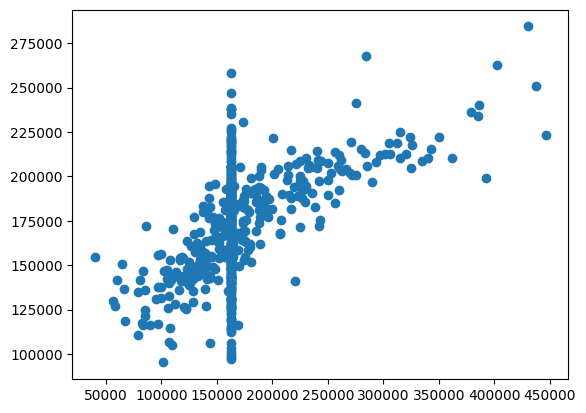

In [110]:
import matplotlib.pyplot as plt
plt.scatter(y_valid,y_pred)

In [106]:
x_valid

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,0,1,2,...,20,21,22,23,24,25,26,27,28,29
1728,60,10274,7,1986,1986,0.0,676.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2689,60,13162,5,2006,2006,0.0,2036.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1151,20,17755,4,1959,1959,0.0,1466.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2762,20,10800,6,1961,1992,0.0,1313.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1180,60,11170,5,1990,1991,0.0,1216.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,90,10547,5,1978,1978,0.0,1152.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
776,20,11210,5,2005,2006,0.0,1614.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1519,20,8050,5,1959,1959,162.0,1143.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1359,20,16737,5,2004,2005,0.0,1980.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [109]:
y_valid

1728    163000.0
2689    163000.0
1151    149900.0
2762    163000.0
1180    250000.0
          ...   
1840    163000.0
776     221500.0
1519    163000.0
1359    315000.0
563     185000.0
Name: SalePrice, Length: 583, dtype: float64